<a href="https://colab.research.google.com/github/Taaniya/linear-algebra-for-nlp/blob/main/Basics_of_Linear_Algebra_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From Linear Algebra to Text representation in NLP




In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

#### Unit vectors of our coordinate system
$\hat{i} $ -> Denotes a unit vector (vector of length 1 unit) pointing in the x-direction 

$\hat{j} $ -> Denotes a unit vector in the y-direction 

We can represent any vector say $ a = (a_1, a_2) $ in terms of these standard unit vectors

$ a = (a_1, a_2) = a_1 \hat i + a_2 \hat j$

$a_1$ and $ a_2 $ are the x,y components of the vector

Together, they are called the basis of our coordinate vector space.

We'll come to the term **basis** more in the subsequent parts of this notebook. 



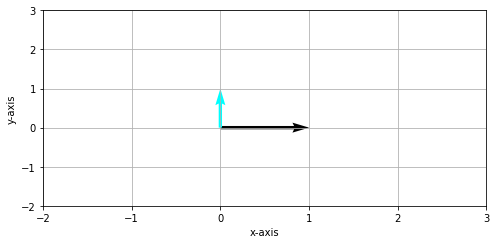

In [ ]:
data = np.array([[1, 0], [0, 1]])              # List of x,y coordinates for each vector head
origin = np.array([[0, 0], [0, 0]])            # List of x,y coordinates for each vector origin
plt.ylim(-2,3)
plt.xlim(-2,3)
plt.quiver(*origin, data[:, 0], data[:, 1], color=['black', 'cyan'], angles='xy', scale_units='xy', scale=1.)
plt.grid()
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

* Suppose we have a vector $ 3\hat{i}$ + 5$\hat{j}$. 
* This vector has x,y coordinates : 3 & 5 respectively.
* These coordinates are the scalars that flip and scale the unit vectors by 3 & 5 units in the x & y directions respectively.


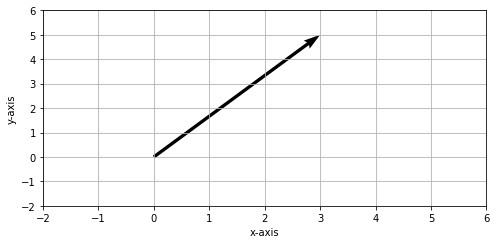

In [ ]:
data = np.array([[3, 5]])              # List of x,y coordinates for each vector head
origin = np.array([[0, 0]])            # List of x,y coordinates for each vector origin
plt.ylim(-2,6)
plt.xlim(-2,6)
plt.quiver(origin[:,0], origin[:,1], data[:, 0], data[:, 1], color=['black'], angles='xy', scale_units='xy', scale=1.)
plt.grid()
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()


### Linear Combination of 2 vectors

If $ \hat{u}$ & $\hat{v}$ are two vectors in a 2 dimensional space,then their linear combination resulting into a vector $\hat{l} $ is represented by -

$\hat{l} = x_1 u + x_2 v$ 

* The numbers $x_1$, $x_2$ are the components of a vector x
* This is essentially a scaling and addition operation by x on the given vectors. 

The above expression of linear combination is equivalent to the following linear system -

$Bx = \hat{l}$

Where B denotes a matrix whose columns are $u$ & $v$.

Let's understand this by an example below with vectors u & v in a 2 dimensional space -

 shape of vector u - (3,)


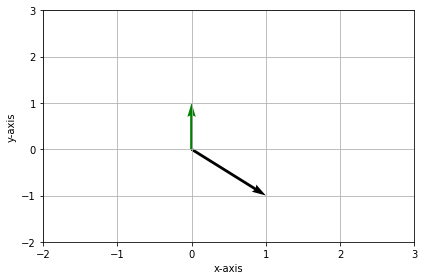

In [ ]:
# Vectors u & v
u_vec = np.array([1, -1, 0])              # The vectors are 3D, we'll only use 2 dimensions
v_vec = np.array([0, 1, -1])
print(f" shape of vector u - {u_vec.shape}")

# Vector x
x_vec = np.array([1.5, 2])

# Let's plot to see how they look in the vector space
data = np.vstack((u_vec, v_vec))[:,:2]              # fetch coords from first 2 dimensions
origin = np.array([[0, 0, 0], [0, 0, 0]])[:,:2]
plt.ylim(-2,3)
plt.xlim(-2,3)
QV = plt.quiver(origin[:,0],origin[:,1], data[:, 0], data[:, 1], color=['black', 'green'], angles='xy', scale_units='xy', scale=1.)
plt.grid()
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

 shape of matrix containing u & v - (3, 2)


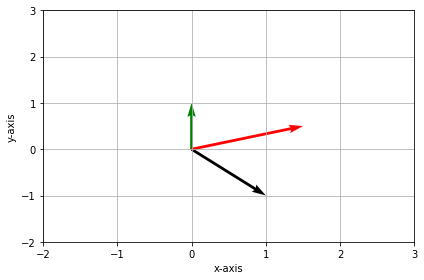

In [ ]:
# Finding their linear combination 
uv_matrix = np.vstack((u_vec, v_vec)).transpose()          # Collecting them into a matrix 
print(f" shape of matrix containing u & v - {uv_matrix.shape}")

l_vec = np.dot(uv_matrix, x_vec)

data = np.vstack((u_vec, v_vec, l_vec))[:,:2]              # fetch coords from first 2 dimensions
origin = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])[:,:2]
plt.ylim(-2,3)
plt.xlim(-2,3)
QV = plt.quiver(origin[:,0],origin[:,1], data[:, 0], data[:, 1], color=['black', 'green', 'red'], angles='xy', scale_units='xy', scale=1.)
plt.grid()
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

We can also understand it from this explanation for a similar example with dimensions given by the instructor from a lecture here - 
<img src="linear_combination_explained.png" />


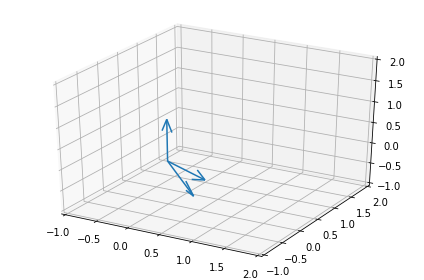

In [ ]:
# Taking the 3 vectors from the example in the image and plotting them in 3D space (The units of axes are different than the vectors in the plot) 
u_vec = np.array([1, -1, 0])
v_vec = np.array([0, 1, -1])
w_vec = np.array([0, 0, 1])

data = np.vstack((u_vec, v_vec, w_vec))             
origin = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(origin[:,0],origin[:,1], origin[:,2], data[:, 0], data[:, 1], data[:,2], )
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])
ax.set_zlim([-1, 2])
plt.grid()
plt.show()

### Span

* A span is a set of all possible combinations of vectors that we can reach with a linear combination of a given pair of vectors
*	The span of most pairs of 2-D vectors is all vectors in the 2-D space. Except, when they line up in the same direction (i.e if they are collinear) , in which case, their span is a line. 

i.e span( $\vec{a}$, $\vec{b}$) = $\mathbb{R}^2 $  (all vectors in 2D space) , provided they are not collinear.

### Collinearity

Collinearity is the case when we have p different predictor variables but some of them are linear combinations of others, so they don't add any other information. 2 collinear vectors / variables will have correlation close to $\pm1$ and can be detected by their correlation matrix.

**Multicollinearity** exists when more than 2 vectors are collinear and any pair of vectors may not necessarily have high correlation.

### Linear Independence

We say that $v_1, v_2, . . . , v_n $ are linearly independent, if none of them is
a linear combination of the others. This is equivalent to saying
that $x_1v_1 + x_2v_2 + . . . + x_nv_n = 0 $ implies $ x_1 = x_2 = . . . = x_n = 0$

Since collinear vectors can be expressed as linear combinations of each other, they are **linearly dependent.**



### Basis
A basis is that set of linearly independent vectors that span that space.
We call these vectors as basis vectors

### Vector space Models in NLP

A **Vector space** is a set V of vectors, where two operations - vector addition and scalar multiplication are defined. For E.g. IF two vectors $\hat u$ & $\hat v$ are in space $V$, then their sum, $\hat w = \hat u + \hat v $ will also lie in the vector space $V$.

A 2D vector space is a set of linearly independent vasis vectors with 2 axes.
Each axis represents a dimension in the vector space.

Recalling the previous plot of vector $ a = (3,5) = 3\hat i + 5 \hat j$ again. This vector is represented on a 2D space with 2 linearly independent basis vectors - X & Y, who also represent the 2 axes as well as the 2 dimenions of the space.

3 & 5 here are the x,y components of this vector for representation on the X-Y 2D space.


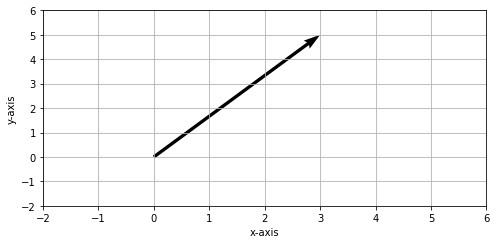

In [ ]:
data = np.array([[3, 5]])              # List of x,y coordinates for each vector head
origin = np.array([[0, 0]])            # List of x,y coordinates for each vector origin
plt.ylim(-2,6)
plt.xlim(-2,6)
plt.quiver(origin[:,0], origin[:,1], data[:, 0], data[:, 1], color=['black'], angles='xy', scale_units='xy', scale=1.)
plt.grid()
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

**Vector space model** for words is a representation of text in vector space.
Here, each word in a corpus is a linearly independent basis vector and each basis vector represents an axis in the vector space. 

* This means, each word is orthogonal to other words/axes. 
* For a corpus of vocabulary $|V|$, $\mathbb{R}$ will contain $|V|$ axes.
* Combination of terms represent documents as points or vectors in this space

For 3 words, we'll have a 3D vector model represented like this -

<img src="VSM_words.png" />

The table above the graph represents the TF-IDF incident matrix.

$D_1$ = (0.91, 0, 0.0011) represents a document vector in the 3 axes - good, house, car. Similarly, we have $D_2$ & $D_3$ document vectors.

How does representation in vector space help us, though?

* One of the common application using this representation is information retrieval for search engines, question answering systems and much more.

* By representing the text into vectors, we aim to use vector algebra to extract semantics from the text and use it for different applications like searching documents containing the similar sementics as those contained in a given search query. 

For eg. For a search token 'buy' , we would want to get all the documents containing different forms of this word - buying, bought and even synonyms of the word 'buy'. Such documents can not be captured from other rudimentary methods representing documents as Binary [incident matrix](https://en.wikipedia.org/wiki/Incidence_matrix).

This is achieved through distance metrics like cosine similarity between vectors of document & query, where the documents closer to the query are ranked the highest.

* The number of words / vocabulary size can be as huge as in millions eg. Google news corpus is 3 Million, which means as many independent axes/dimensions to represent the vectors. Hence, we want to use the operations in vector space to reduce the number of dimensions and bring words with similar to each other in the same axis.

### Dense vectors 
* The above operations are possible on document vectors which are represented by extending the above vector representation of documents to documents represented as distributed or dense vectors. These representations capture the semantics of the text and also captures the linear combinations of word vectors 

* The previous vector space model with each word representing a separate dimension results in sparse vectors

* Dense vectors captures the context in the vector representation. The dense vector of words are such that words appearing in similar contexts will have similar representations.

* These dense vectors are also called as word embeddings or distributed representations.

* word2vec is one such framework to **learn** dense vectors of words from large corpus. It has 2 variants - skip-gram and CBOW(continuous bag of words)

* Some of the other frameworks and techniques to obtain dense vectors are Global Vectors(GloVe), fastText, ELMo(Embeddings from Language Model) and most recent state of the art Bert based approached to obtain contextualized word embeddings during inference.


### References -
*	[Linear Combination & span, Khan Academy](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/linear-combinations/v/linear-combinations-and-span)

*	[Linear Combination, span & basis vectors, 3Blue1Brown](https://www.youtube.com/watch?v=k7RM-ot2NWY)

*	[Independence, Basis & Dimension, MIT](
https://www.youtube.com/watch?v=eeMJg4uI7o0) 

*	[Matrices-Introduction to Vectors, MIT](https://math.mit.edu/~gs/linearalgebra/linearalgebra5_1-3.pdf)

* [Vector space models for NLP, NPTEL](https://www.youtube.com/watch?v=6Nz88LHOIdo)

* [Multicollinearity, Carnegie Mellon University Lecture](http://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/lecture-17.pdf)

* An introduction to statistical learning, E-Book by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. 

* [Vector Spaces](https://www.maths.tcd.ie/~pete/ma1111/chapter3.pdf)

* [Vector space & Operators, MIT](https://ocw.mit.edu/courses/physics/8-05-quantum-physics-ii-fall-2013/lecture-notes/MIT8_05F13_Chap_03.pdf)


* [Vector in 2D, 3D Cartisean coordinates](https://mathinsight.org/vectors_cartesian_coordinates_2d_3d)